# Color representations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams["figure.facecolor"]=(1,1,1,1)

## Scatter plots

In this section, we use scatter plots to visualize the color content of the image.

First, we read and display the input image.

In [3]:
img = cv2.imread('images/fruits.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 511.5, 479.5, -0.5)

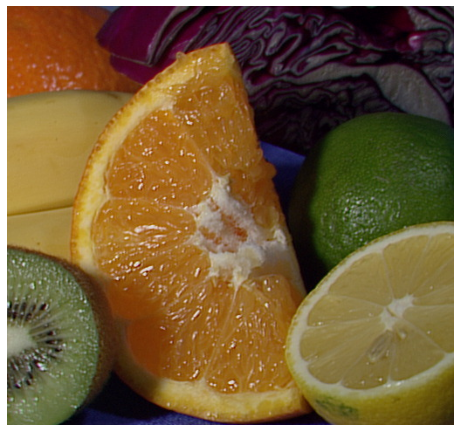

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

Then, we subsample the image by factor 4, extract different color channels, and make an $N \times 3$ array, where $N$ is the number of pixels.

In [5]:
img_small = cv2.resize(img, (0,0), fx=0.25, fy=0.25)
r, g, b = cv2.split(img_small)
r, g, b = (r.ravel(), g.ravel(), b.ravel())
color = np.array((r, g, b),dtype=np.float32).T/255

Each row of the array is a feature vector that can be represented as a point in the three-dimensional space. In the scatter plot, we can also give the corresponding color to individual points.

Text(0.5, 0, 'B')

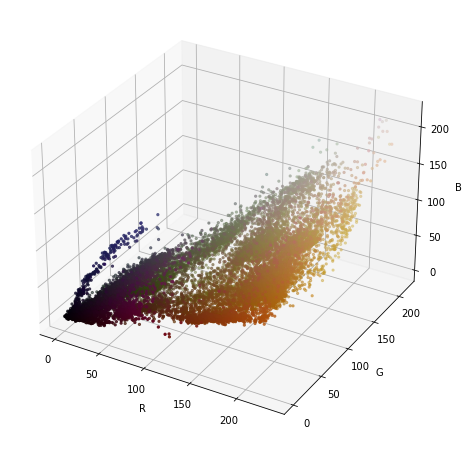

In [6]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r, g, b, c=color, marker=".")
axis.set_xlabel("R")
axis.set_ylabel("G")
axis.set_zlabel("B")

As we can see the colors in the RGB space have high correlation. Next, we do the same in the HSV color space where the color components are more independent. 

In [7]:
hsv = cv2.cvtColor(img_small, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
h, s, v = (h.ravel(), s.ravel(), v.ravel())

Text(0.5, 0, 'V')

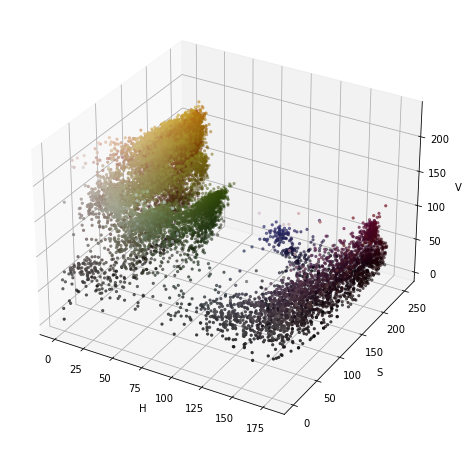

In [8]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h, s, v, c=color, marker=".")
axis.set_xlabel("H")
axis.set_ylabel("S")
axis.set_zlabel("V")

Now, we can see that colors form clusters in the HSV space. Instead of a 3D scatter plot we can also visualise the colors in HS space without the brightness component using a 2D scatter plot.

Text(0, 0.5, 'S')

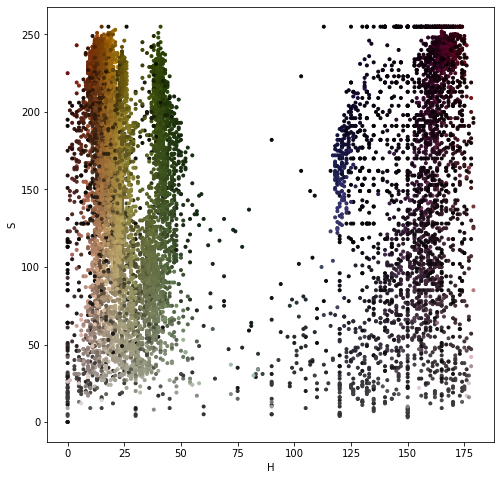

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(h, s, c=color, marker=".")
plt.xlabel("H")
plt.ylabel("S")

Normalized rg space is another brightness independent chromaticity space. For comparison, let's see how this representation differs from the HS space.

In [10]:
rn, gn, bn = (x.astype(np.float32) for x in (r, g, b))
I = rn + gn + bn
rn, gn, bn = (rn, gn, bn)/I

Text(0, 0.5, 'g')

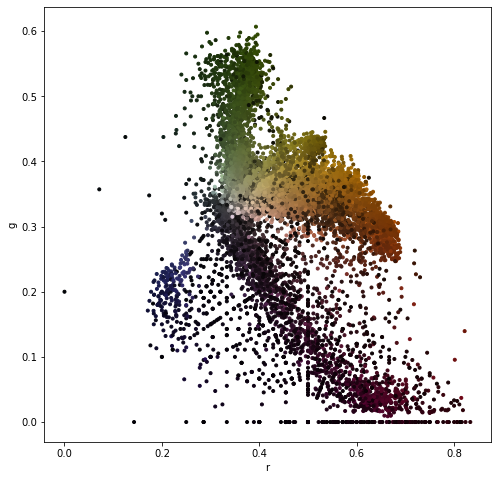

In [11]:
fig = plt.figure(figsize=(8,8))
plt.scatter(rn,gn, c=color, marker=".")
plt.xlabel("r")
plt.ylabel("g")

Again, we notice that colors form clusters.

## Color histograms
Color histogram is another representation for color images. Similar to a scatter plot color histogram is invariant to spatial transformations such as translation and rotation. In addition, color histogram aggregates the color information over the whole image, and it can be used as a feature vector to classify images, for example, in image retrieval problems.

As we can see from the scatter plots, the color space remains relatively sparse. To avoid empty or almost empty bins and to make color histogram compact we need to have sufficiently coarse binning of the color space. In the following example, we use $8 \times 8 \times 8$ binnings. The 3D histogram is vectorized and represented as a 1D plot of a 512 dimensional feature vector.

In [12]:
imgv = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

In [13]:
hist_rgb, edg = np.histogramdd(imgv, 8)

Text(0.5, 1.0, 'RGB histogram (8 x 8 x 8 bins)')

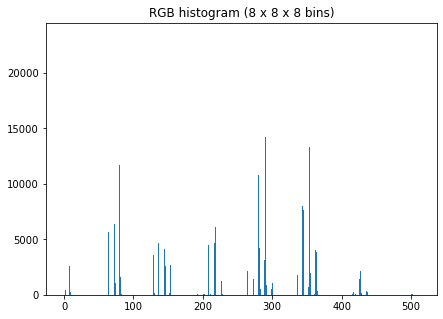

In [14]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(512),hist_rgb.ravel())
plt.title('RGB histogram (8 x 8 x 8 bins)')

The resulting histogram is still quite sparse and most of the bins have zero values. Instead of an RGB histogram, it is often better to use a brightness independent color representation. As an example, we convert the image to the CIELAB color space that is often used to measure color differences. In this case, the color histogram is created based on the a* and b* channels that represent the chromaticity values (red-green and blue-yellow). These channels are both quantized to 16 bins. Hence, the resulting 1D histogram has 256 bins.

In [15]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
labv = np.reshape(lab, (img.shape[0] * img.shape[1], img.shape[2]))

In [16]:
hist_ab, _ = np.histogramdd(labv[:,1:], 16)

Text(0.5, 1.0, 'ab histogram (16 x 16 bins)')

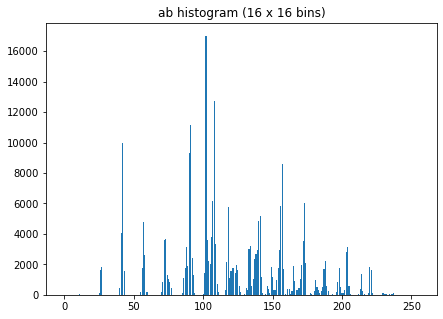

In [17]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(256),hist_ab.ravel())
plt.title('ab histogram (16 x 16 bins)')

Finally, we take another image and create the corresponding RGB and a*b* histograms to illustrate the difference between the images in terms of the histograms.

In [18]:
img2 = cv2.imread('images/baboon.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(-0.5, 511.5, 511.5, -0.5)

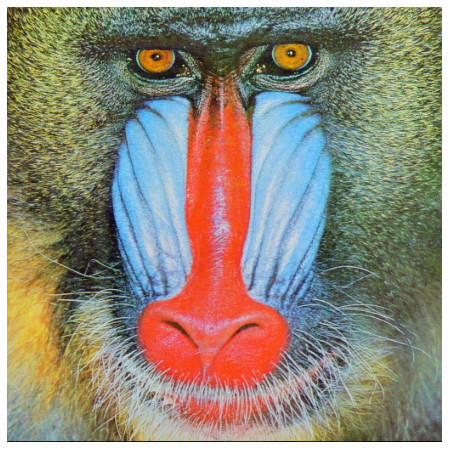

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(img2)
plt.axis('off')

In [20]:
imgv2 = np.reshape(img2, (img2.shape[0] * img2.shape[1], img2.shape[2]))
hist2_rgb, _ = np.histogramdd(imgv2, 8)

Text(0.5, 1.0, 'RGB histogram (8 x 8 x 8 bins)')

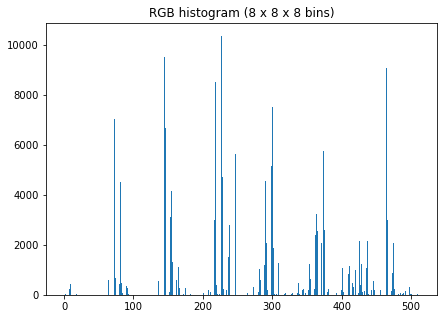

In [21]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(512),hist2_rgb.ravel())
plt.title('RGB histogram (8 x 8 x 8 bins)')

In [22]:
lab2 = cv2.cvtColor(img2, cv2.COLOR_RGB2Lab)
labv2 = np.reshape(lab2, (img2.shape[0] * img2.shape[1], img2.shape[2]))

In [23]:
hist2_ab, _ = np.histogramdd(labv2[:,1:], 16)

Text(0.5, 1.0, 'ab histogram (16 x 16 bins)')

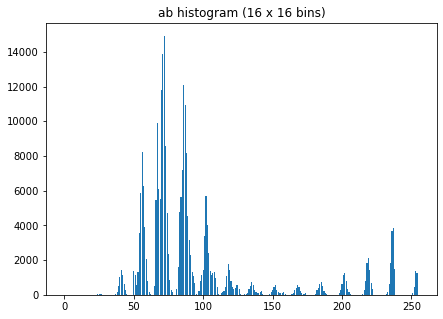

In [24]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(256),hist2_ab.ravel())
plt.title('ab histogram (16 x 16 bins)')

We can easily see that the two images have clearly different color distributions that enables us to classify them based on their histograms.